#### Импорт необходимых модулей

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from calc_methods_integral import Integrator, SimpsonMethod, RectangleMethod, TrapezoidalMethod

#### Задаем истинный интеграл, подсчитанный в аналитическом этапе

In [101]:
TRUE_INTEGRAL: float = (np.pow(3, 7) - 1) / np.log(3)

#### Функция, которая используется для исследования вычислений интеграла

In [102]:
def f_research(x: float) -> float:
    return np.pow(3, x)

#### Функция, для генерации разбиения и визуализация областей

In [103]:
def plot_area(method: Integrator, a: float, b: float, n: int, f: callable, ax) -> None:
    dx: float = (b - a) / n
    x: np.ndarray = np.linspace(a, b, 500)
    ax.plot(x, [f(xi) for xi in x], label="f(x)=3^x")
    for i in range(n):
        x0: float = a + i * dx
        x1: float = x0 + dx
        if isinstance(method, RectangleMethod):
            if method.mode == "left":
                height: float = f(x0)
            elif method.mode == "right":
                height: float = f(x1)
            elif method.mode == "mid":
                height: float = f((x0 + x1) / 2)
            else:
                height: float = f(np.random.uniform(x0, x1))
            xs: list = [x0, x0, x1, x1]
            ys: list = [0, height, height, 0]
            ax.fill(xs, ys, alpha=0.3)
        elif isinstance(method, TrapezoidalMethod):
            ys: list = [0, f(x0), f(x1), 0]
            xs: list = [x0, x0, x1, x1]
            ax.fill(xs, ys, alpha=0.3)
        elif isinstance(method, SimpsonMethod):
            xi: float = (x0 + x1)/2
            xs: np.ndarray = np.linspace(x0, x1, 100)
            ys: list = [f(xi) for xi in xs]
            ax.fill_between(xs, ys, alpha=0.3)
    ax.set_title(f"{method.__class__.__name__}, n={n}")
    ax.legend()

#### Получение приближенных значений интеграла всеми методами и рассчёт ошибки вычисления

In [104]:
a: float = 0.0
b: float = 7.0
integrators: dict = {
    "rect_left": RectangleMethod("left"),
    "rect_mid": RectangleMethod("mid"),
    "rect_right": RectangleMethod("right"),
    "trap": TrapezoidalMethod(),
    "simpson": SimpsonMethod()
}

results: list = []
for n in [np.pow(2, k) for k in range(0, 8)]:
    for name, method in integrators.items():
        if name == "simpson" and n % 2 != 0:
            continue
        i_approx: float = method.integrate(a, b, n, f_research)
        erroro: float = i_approx - TRUE_INTEGRAL
        results.append({"method": name, "n": n, "approx": i_approx, "error": erroro})
df = pd.DataFrame(results)
df

,method,n,approx,error
0,rect_left,1,7.000000,-1982.782949
1,rect_mid,1,327.357603,-1662.425347
2,rect_right,1,15309.000000,13319.217051
3,trap,1,7658.000000,5668.217051
4,rect_left,2,167.178801,-1822.604148
5,rect_mid,2,1143.255772,-846.527177
6,rect_right,2,7818.178801,5828.395852
7,trap,2,3992.678801,2002.895852
8,simpson,2,2770.905068,781.122119
9,rect_left,4,655.217287,-1334.565663


#### Составление датафрейма с метриками MSE и MAE

In [105]:
metrics: pd.DataFrame = df.groupby("method").agg(
    mse=("error", lambda e: (np.pow(e, 2)).mean()),
    mae=("error", lambda e: e.abs().mean())
).reset_index()
print('True integral:', TRUE_INTEGRAL)
print(metrics)

True integral: 1989.7829494062664
       method           mse          mae
0   rect_left  1.243335e+06   848.911813
1    rect_mid  4.453235e+05   360.650348
2  rect_right  2.739369e+07  2961.644827
3     simpson  8.869873e+04   127.644117
4        trap  4.562363e+06  1056.366507


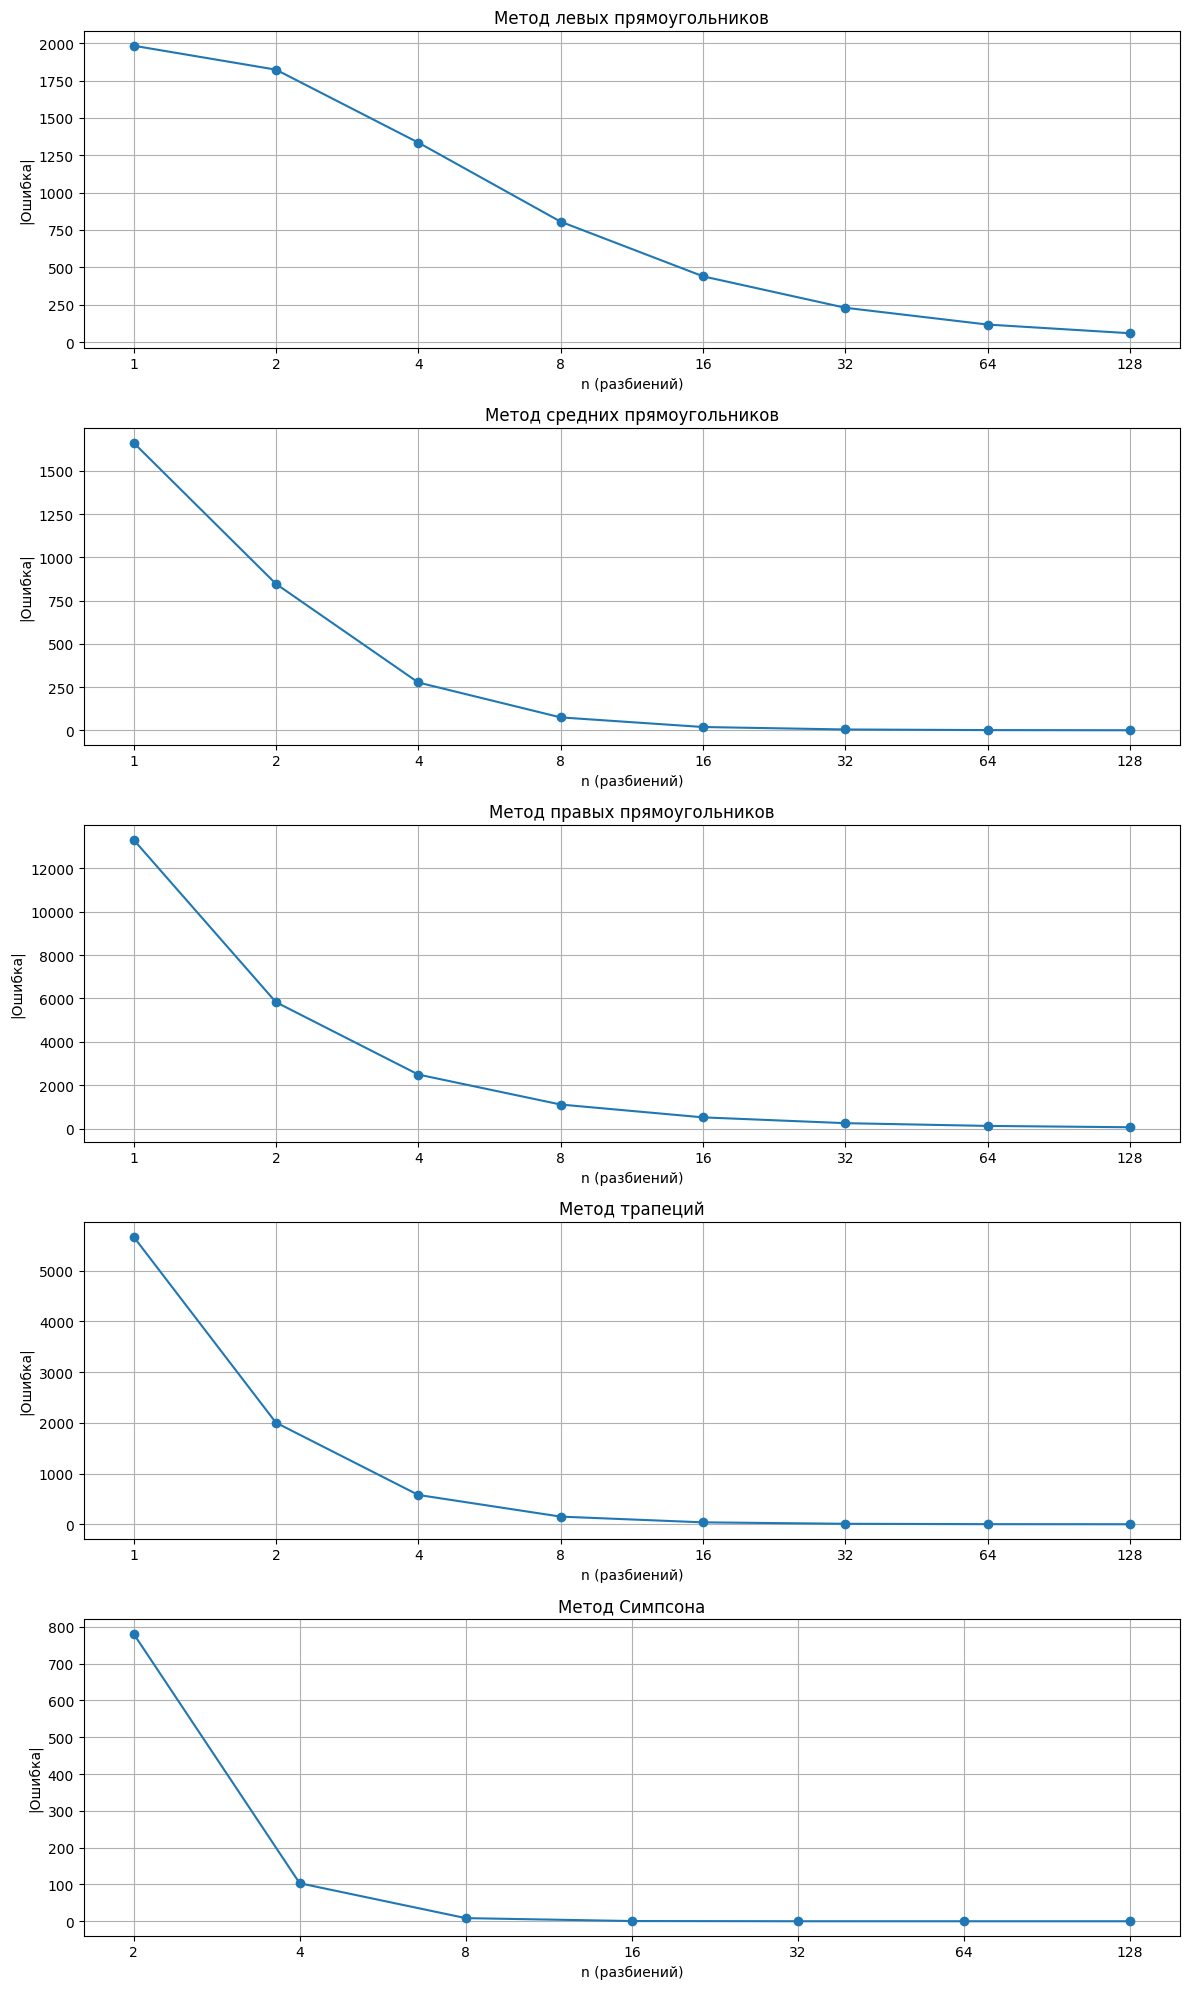

In [106]:
methods: list = ['rect_left', 'rect_mid', 'rect_right', 'trap', 'simpson']
titles: dict = {
    'rect_left': 'Метод левых прямоугольников',
    'rect_mid': 'Метод средних прямоугольников',
    'rect_right': 'Метод правых прямоугольников',
    'trap': 'Метод трапеций',
    'simpson': 'Метод Симпсона'
}
fig, axes = plt.subplots(len(methods), 1, figsize=(12, 20))
for idx, name in enumerate(methods):
    ax = axes[idx]
    df_m = df[df['method'] == name]
    ax.plot(df_m['n'], df_m['error'].abs(), marker='o')
    ax.set_xscale('log', base=2)
    ax.set_xticks(df_m['n'].unique())
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # красивый вывод
    ax.set_xlabel('n (разбиений)')
    ax.set_ylabel('|Ошибка|')
    ax.set_title(titles[name])
    ax.grid(True)
plt.tight_layout()
plt.show()

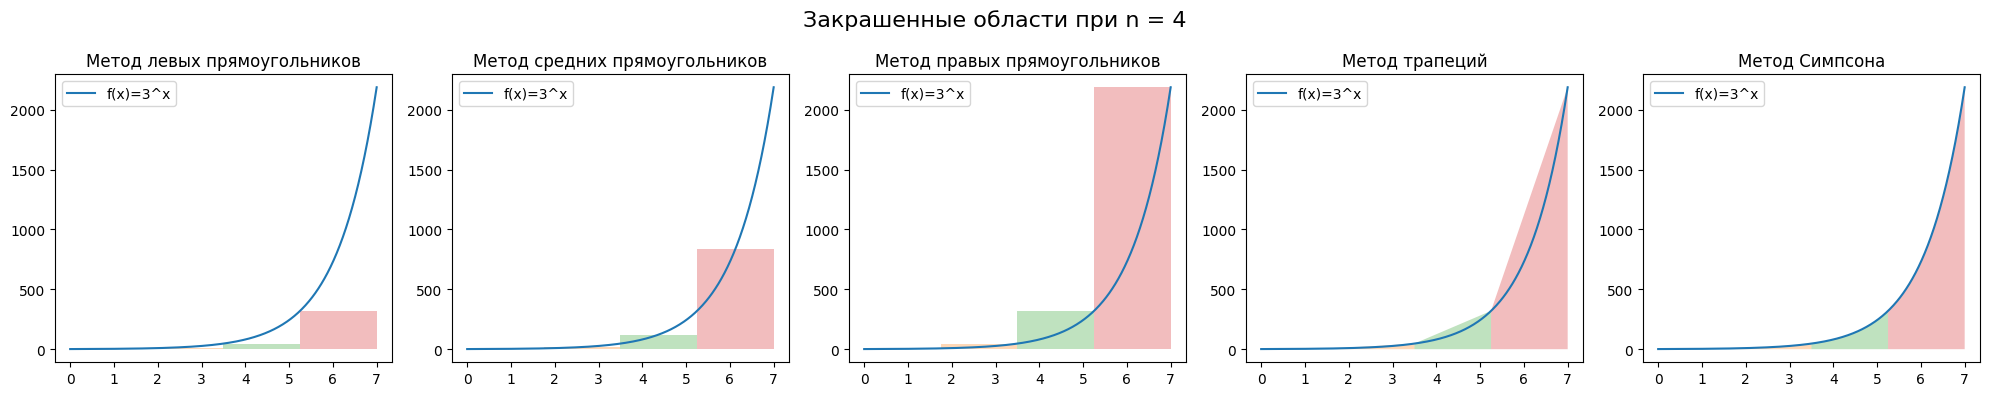

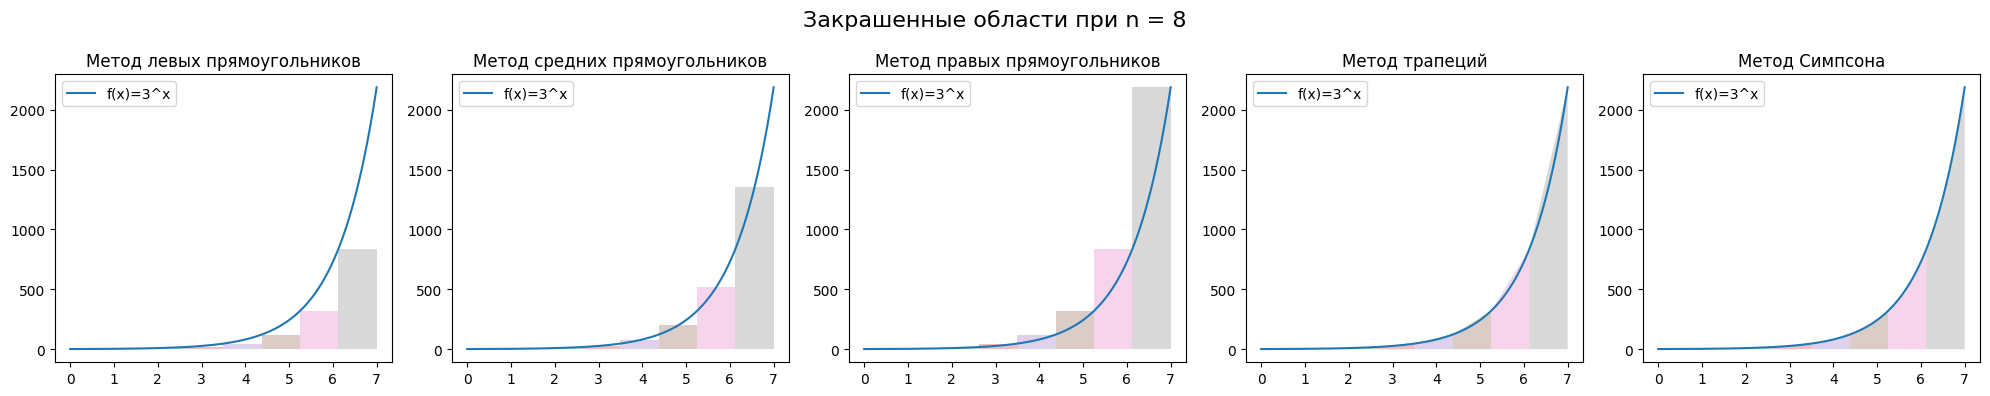

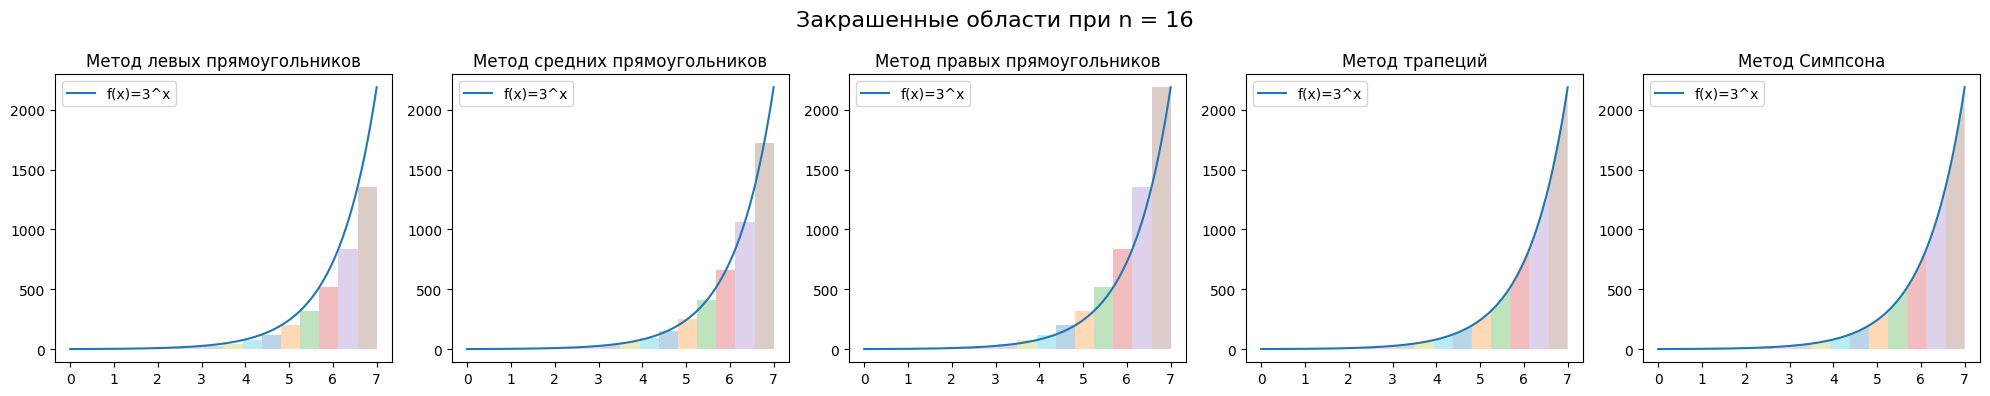

In [107]:
ns = [4, 8, 16]
methods_to_plot = {
    'Метод левых прямоугольников': RectangleMethod('left'),
    'Метод средних прямоугольников': RectangleMethod('mid'),
    'Метод правых прямоугольников': RectangleMethod('right'),
    'Метод трапеций': TrapezoidalMethod(),
    'Метод Симпсона': SimpsonMethod()
}

for n in ns:
    fig, axes = plt.subplots(1, len(methods_to_plot), figsize=(20, 4))
    fig.suptitle(f"Закрашенные области при n = {n}", fontsize=16)
    for ax, (title, method) in zip(axes, methods_to_plot.items()):
        if isinstance(method, SimpsonMethod) and n % 2 != 0:
            ax.set_title(f"{title} (n должно быть чётным)")
            ax.axis('off')
            continue
        plot_area(method, a, b, n, f_research, ax)
        ax.set_title(title)
    plt.tight_layout()
    plt.show()